In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv('D:/internship_assignment/ML/survey_results_public.csv')
df.head(5)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [5]:
#Selecting relevent parameters
df = df[['MainBranch','Employment','Age','Gender','RemoteWork','CodingActivities', 'EdLevel',
             'YearsCode', 'DevType', 'Country', 'CompTotal', 'LearnCode','LearnCodeOnline', 'MentalHealth',
        "LanguageWantToWorkWith",'DatabaseWantToWorkWith','ToolsTechWantToWorkWith']]
df.head(3)

,MainBranch,Employment,Age,Gender,RemoteWork,CodingActivities,EdLevel,YearsCode,DevType,Country,CompTotal,LearnCode,LearnCodeOnline,MentalHealth,LanguageWantToWorkWith,DatabaseWantToWorkWith,ToolsTechWantToWorkWith
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",NaN,NaN,Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,Canada,NaN,NaN,NaN,NaN,Rust;TypeScript,NaN,NaN
2,"I am not primarily a developer, but I write co...","Employed, full-time",25-34 years old,Man,"Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,32000.0,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,"I have a mood or emotional disorder (e.g., dep...",C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,NaN


DATA PREPERATION

In [6]:
df['MainBranch'].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [7]:
df['MainBranch'] = df['MainBranch'].replace({'None of these': np.nan, 
                                               'I am a developer by profession': 'Professional developer',
                                             'I am not primarily a developer, but I write code sometimes as part of my work':'Occasional Coder',
                                              'I code primarily as a hobby':'Recreational coding',
                                              'I am learning to code':'Aspiring coder',
                                              'I used to be a developer by profession, but no longer am':'Former developer'})
df['MainBranch'].value_counts()

Professional developer    53507
Aspiring coder             6309
Occasional Coder           5794
Recreational coding        4865
Former developer           1296
Name: MainBranch, dtype: int64

In [8]:
df['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [9]:
df['YearsCode'] = df['YearsCode'].replace({np.nan: 0,
                                          'Less than 1 year': 0,
                                          'More than 50 years': 50 })

def categorize_experience(experience):
    if experience < 1:
        return 'Beginner'
    elif experience >= 1 and experience < 3:
        return 'Learner'
    elif experience >= 3 and experience < 5:
        return 'Intermediate'
    elif experience >= 5 and experience < 10:
        return 'Advance'
    else:
        return 'Veteran'

df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCode'] = df['YearsCode'].apply(categorize_experience)

df['YearsCode'].value_counts()



Veteran         35510
Advance         20889
Intermediate     8602
Learner          4917
Beginner         3350
Name: YearsCode, dtype: int64

In [10]:
df['EdLevel'].unique()

array([nan, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

In [11]:
df['EdLevel'] = df['EdLevel'].replace({'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master’s degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor’s degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school,',
       'Some college/university study without earning a degree' : 'Auditing courses',
       'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Other doctoral degree' ,
       'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
       'Professional degree (JD, MD, etc.)' : 'Professional degree'})

df['EdLevel'].value_counts()

Bachelor’s degree            30276
Master’s degree              15486
Auditing courses              9326
Secondary school,             7904
Associate degree              2236
Other doctoral degree         2169
Primary/elementary school     1806
Something else                1247
Professional degree           1121
Name: EdLevel, dtype: int64

In [12]:
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)' : 'Hybrid'})
df['RemoteWork'].value_counts()


Fully remote      25341
Hybrid            25021
Full in-person     8596
Name: RemoteWork, dtype: int64

In [13]:
df['Gender'].unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman', 'Man;Or, in your own words:',
       'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Woman',
       'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Woman'], dtype=object)

In [14]:
gen = df['Gender'].value_counts()
print(gen)

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [15]:
top_3_gen = gen.head(3).index
df['Gender'] = df['Gender'].where(df['Gender'].isin(top_3_gen), np.nan)
df['Gender'].value_counts()

Man                  64607
Woman                 3399
Prefer not to say     1172
Name: Gender, dtype: int64

In [16]:
country = df['Country'].value_counts()
print(country)

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: Country, Length: 180, dtype: int64


In [17]:
country_list = country[country >= 1000].index.tolist()
df = df[df['Country'].isin(country_list)]
df['Country'].value_counts()

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Sweden                                                   1020
Turkey                                                   1020
Name: Country, dtype: int64

In [18]:
df.head()

,MainBranch,Employment,Age,Gender,RemoteWork,CodingActivities,EdLevel,YearsCode,DevType,Country,CompTotal,LearnCode,LearnCodeOnline,MentalHealth,LanguageWantToWorkWith,DatabaseWantToWorkWith,ToolsTechWantToWorkWith
1,Professional developer,"Employed, full-time",NaN,NaN,Fully remote,Hobby;Contribute to open-source projects,NaN,Beginner,NaN,Canada,NaN,NaN,NaN,NaN,Rust;TypeScript,NaN,NaN
2,Occasional Coder,"Employed, full-time",25-34 years old,Man,Hybrid,Hobby,Master’s degree,Veteran,Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,32000.0,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,"I have a mood or emotional disorder (e.g., dep...",C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,NaN
4,Professional developer,"Employed, full-time",25-34 years old,NaN,Hybrid,Hobby,Bachelor’s degree,Advance,"Developer, front-end;Developer, full-stack;Dev...",United States of America,NaN,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Firebase Realtim...,Docker;Kubernetes
5,Occasional Coder,"Student, full-time",25-34 years old,NaN,NaN,NaN,Master’s degree,Veteran,NaN,Germany,NaN,"Books / Physical media;School (i.e., Universit...",NaN,"Or, in your own words:",Lua,NaN,Homebrew
6,Recreational coding,"Student, part-time",Under 18 years old,Man,NaN,NaN,"Secondary school,",Intermediate,NaN,India,NaN,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Video-based Online Courses,None of the above,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,MySQL;Oracle;PostgreSQL,npm


In [19]:
df['Age'].unique()

array([nan, '25-34 years old', 'Under 18 years old', '18-24 years old',
       '35-44 years old', '55-64 years old', '45-54 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [20]:
df['Age'] = df['Age'].replace({'Under 18 years old' : 'under 18',
                              '18-24 years old' : '18-24',
                              '25-34 years old' : '25-34',
                              '35-44 years old' : '35-44',
                              '45-54 years old' : '45-54',
                              '55-64 years old' : '55-64',
                              '65 years or older' : 'Above 65'})
df['Age'].value_counts()

25-34                18237
18-24                10143
35-44                 9817
45-54                 3917
under 18              2573
55-64                 1631
Above 65               473
Prefer not to say      388
Name: Age, dtype: int64

In [21]:
df['LearnCode'].value_counts().head(5)

School (i.e., University, College, etc)                                                                                                                                   2488
Other online resources (e.g., videos, blogs, forum)                                                                                                                       2129
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                        1993
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                               1808
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification    1676
Name: LearnCode, dtype: int64

In [22]:
learn = ['Books','online resources','School']

for i in learn:
    df['LearnCode'] = df['LearnCode'].where(~(df['LearnCode'].str.contains(i,na=False)),i)    
    
df['LearnCode'].value_counts().head(3)    

Books               26683
online resources    13813
School               4919
Name: LearnCode, dtype: int64

In [23]:
df.head()

,MainBranch,Employment,Age,Gender,RemoteWork,CodingActivities,EdLevel,YearsCode,DevType,Country,CompTotal,LearnCode,LearnCodeOnline,MentalHealth,LanguageWantToWorkWith,DatabaseWantToWorkWith,ToolsTechWantToWorkWith
1,Professional developer,"Employed, full-time",NaN,NaN,Fully remote,Hobby;Contribute to open-source projects,NaN,Beginner,NaN,Canada,NaN,NaN,NaN,NaN,Rust;TypeScript,NaN,NaN
2,Occasional Coder,"Employed, full-time",25-34,Man,Hybrid,Hobby,Master’s degree,Veteran,Data scientist or machine learning specialist;...,United Kingdom of Great Britain and Northern I...,32000.0,Books,Technical documentation;Blogs;Programming Game...,"I have a mood or emotional disorder (e.g., dep...",C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,NaN
4,Professional developer,"Employed, full-time",25-34,NaN,Hybrid,Hobby,Bachelor’s degree,Advance,"Developer, front-end;Developer, full-stack;Dev...",United States of America,NaN,online resources,Technical documentation;Blogs;Stack Overflow;O...,NaN,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Firebase Realtim...,Docker;Kubernetes
5,Occasional Coder,"Student, full-time",25-34,NaN,NaN,NaN,Master’s degree,Veteran,NaN,Germany,NaN,Books,NaN,"Or, in your own words:",Lua,NaN,Homebrew
6,Recreational coding,"Student, part-time",under 18,Man,NaN,NaN,"Secondary school,",Intermediate,NaN,India,NaN,online resources,Stack Overflow;Video-based Online Courses,None of the above,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,MySQL;Oracle;PostgreSQL,npm


In [24]:
#df['LanguageWantToWorkWith'].value_counts().head(5)
lang = df['LanguageWantToWorkWith'].value_counts()
print(lang)


Python                                                          645
HTML/CSS;JavaScript;TypeScript                                  616
Rust                                                            597
C#                                                              383
Go                                                              320
                                                               ... 
C#;C++;Delphi;Java;JavaScript;Kotlin;SQL                          1
Elixir;Ruby;Rust;TypeScript                                       1
Bash/Shell;C#;Java;Kotlin;Python;SQL                              1
HTML/CSS;Python;Swift;TypeScript                                  1
Bash/Shell;C#;HTML/CSS;JavaScript;Perl;PowerShell;TypeScript      1
Name: LanguageWantToWorkWith, Length: 17543, dtype: int64


In [25]:
top_5_lang = lang.head(5).index
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].where(df['LanguageWantToWorkWith'].isin(top_5_lang), np.nan)
df['LanguageWantToWorkWith'].value_counts()

Python                            645
HTML/CSS;JavaScript;TypeScript    616
Rust                              597
C#                                383
Go                                320
Name: LanguageWantToWorkWith, dtype: int64

In [26]:
database = df['DatabaseWantToWorkWith'].value_counts()
print(database)

PostgreSQL                                                                                    2804
Microsoft SQL Server                                                                          1432
MongoDB                                                                                       1222
MySQL                                                                                         1109
SQLite                                                                                        1108
                                                                                              ... 
Cloud Firestore;Elasticsearch;Microsoft SQL Server;Redis                                         1
Couchbase;CouchDB;MongoDB;SQLite                                                                 1
Couchbase;CouchDB;DynamoDB;Elasticsearch;MySQL;PostgreSQL;Redis                                  1
Cloud Firestore;DynamoDB;Elasticsearch;Microsoft SQL Server;PostgreSQL;Redis;SQLite              1
Cassandra;

In [27]:
top_5_database = database.head(5).index
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].where(df['DatabaseWantToWorkWith'].isin(top_5_database), np.nan)
df['DatabaseWantToWorkWith'].value_counts()

PostgreSQL              2804
Microsoft SQL Server    1432
MongoDB                 1222
MySQL                   1109
SQLite                  1108
Name: DatabaseWantToWorkWith, dtype: int64

In [28]:
tools = df['ToolsTechWantToWorkWith'].value_counts()
print(tools)

Docker                                                                                          2864
npm                                                                                             2201
Docker;Kubernetes                                                                               1904
Docker;npm                                                                                      1776
Docker;Kubernetes;npm                                                                           1156
                                                                                                ... 
Ansible;Chef;Docker;Flow;Kubernetes;Pulumi;Puppet;Terraform;Unity 3D;Unreal Engine;Yarn            1
Chef;Docker;Flow;Homebrew;Kubernetes;npm;Pulumi;Puppet;Terraform;Unity 3D;Unreal Engine;Yarn       1
Kubernetes;npm;Pulumi;Terraform;Yarn                                                               1
Ansible;Chef;Docker;Flow;Homebrew;Kubernetes;npm;Pulumi;Puppet;Terraform;Yarn              

In [29]:
top_5_tools = tools.head(5).index
df['ToolsTechWantToWorkWith'] = df['ToolsTechWantToWorkWith'].where(df['ToolsTechWantToWorkWith'].isin(top_5_tools), np.nan)
df['ToolsTechWantToWorkWith'].value_counts()

Docker                   2864
npm                      2201
Docker;Kubernetes        1904
Docker;npm               1776
Docker;Kubernetes;npm    1156
Name: ToolsTechWantToWorkWith, dtype: int64

In [30]:
dev = df['DevType'].value_counts()
print(dev)

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  4959
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    3620
Developer, front-end                                                                                                                            

In [31]:
top_5_dev = dev.head(5).index
df['DevType'] = df['DevType'].where(df['DevType'].isin(top_5_dev), np.nan)
df['DevType'].value_counts()

Developer, full-stack                                             4959
Developer, back-end                                               3620
Developer, front-end                                              1461
Developer, front-end;Developer, full-stack;Developer, back-end    1134
Developer, full-stack;Developer, back-end                          989
Name: DevType, dtype: int64

In [32]:
act = df['CodingActivities'].value_counts()
print(act)

Hobby                                                                                                          12844
I don’t code outside of work                                                                                    5334
Hobby;Contribute to open-source projects                                                                        4905
Hobby;Freelance/contract work                                                                                   2131
Hobby;School or academic work                                                                                   1933
                                                                                                               ...  
Contribute to open-source projects;Bootstrapping a business;Freelance/contract work;Other (please specify):        1
Contribute to open-source projects;Freelance/contract work;Other (please specify):;School or academic work         1
Freelance/contract work;Other (please specify):;School or academ

In [33]:
top_5_act = act.head(5).index
df['CodingActivities'] = df['CodingActivities'].where(df['CodingActivities'].isin(top_5_act), np.nan)
df['CodingActivities'].value_counts()

Hobby                                       12844
I don’t code outside of work                 5334
Hobby;Contribute to open-source projects     4905
Hobby;Freelance/contract work                2131
Hobby;School or academic work                1933
Name: CodingActivities, dtype: int64

EDA

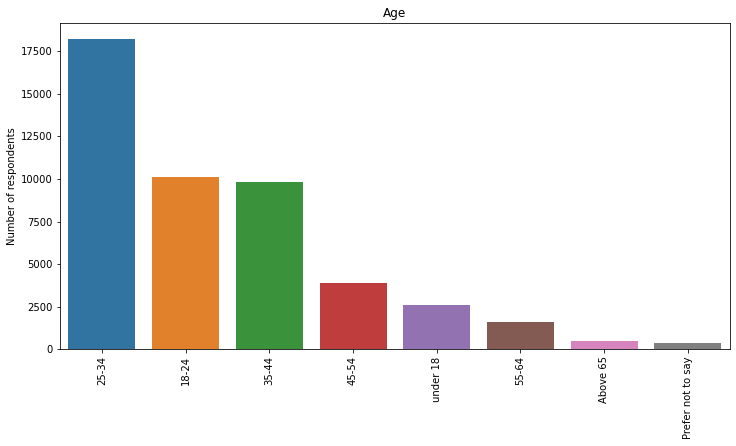

In [34]:
#Age
Age = df['Age'].value_counts()
plt.figure(figsize=(12,6))
plt.title('Age')
plt.xticks(rotation=90)
sns.barplot(x=Age.index,y=Age)
plt.ylabel('Number of respondents');

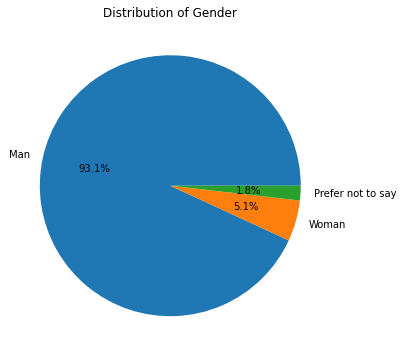

In [35]:
gender_dist = df.Gender.value_counts()
plt.figure(figsize=(12,6))
plt.title("Distribution of Gender")
plt.pie(gender_dist,labels = gender_dist.index,autopct='%1.1f%%',startangle=0);

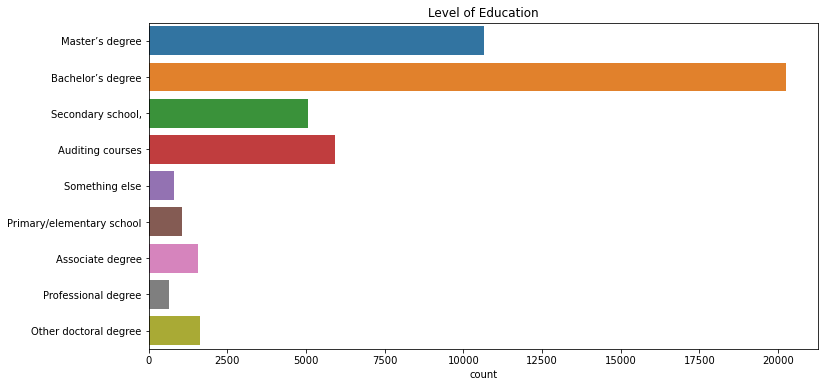

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y=df.EdLevel)
plt.title("Level of Education");
plt.ylabel(None);

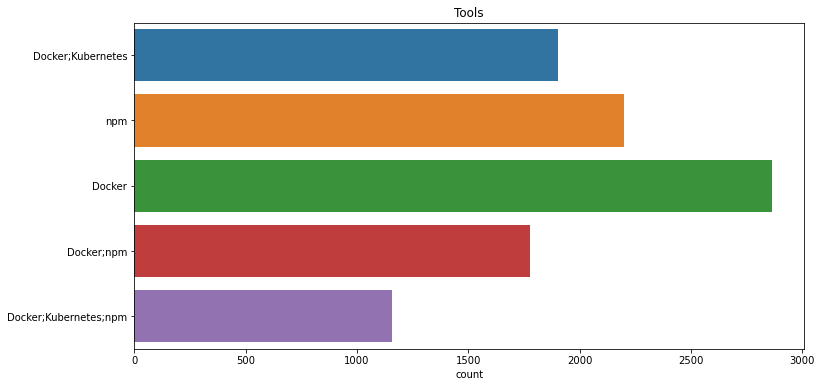

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(y=df.ToolsTechWantToWorkWith)
plt.title("Tools");
plt.ylabel(None);

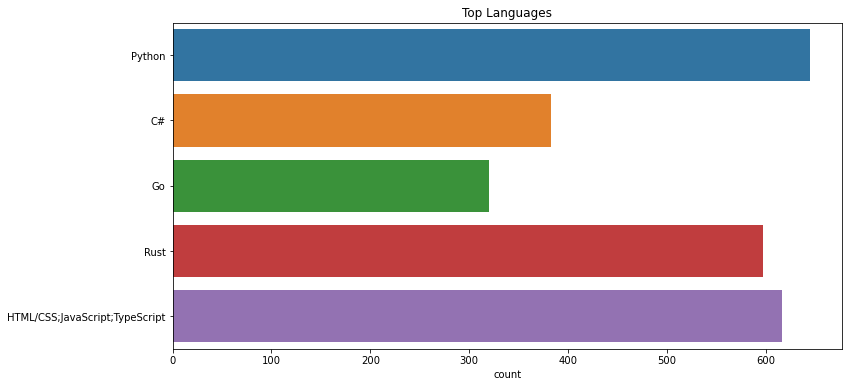

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(y=df.LanguageWantToWorkWith)
plt.title("Top Languages");
plt.ylabel(None);

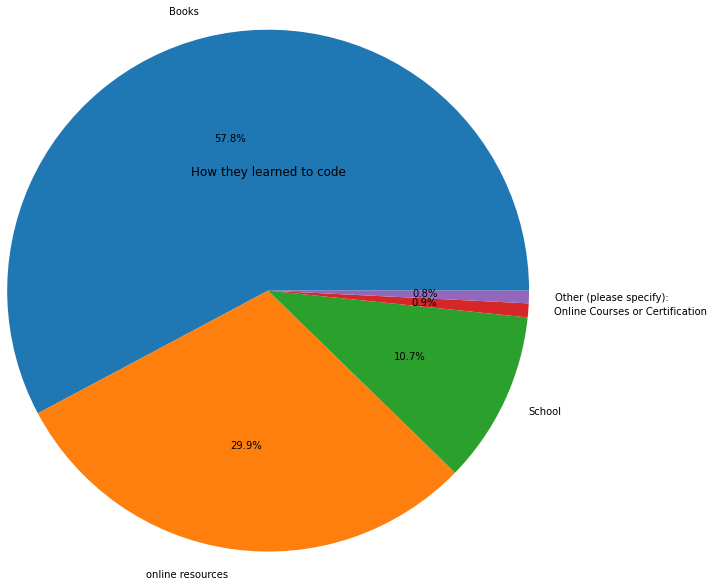

<Figure size 1296x1296 with 0 Axes>

In [39]:
learncode = df.LearnCode.value_counts().head(5)
plt.title("How they learned to code")
plt.pie(learncode,labels = learncode.index,autopct='%1.1f%%',radius=3);
plt.figure(figsize=(18,18));

Text(0.5, 1.0, 'Country')

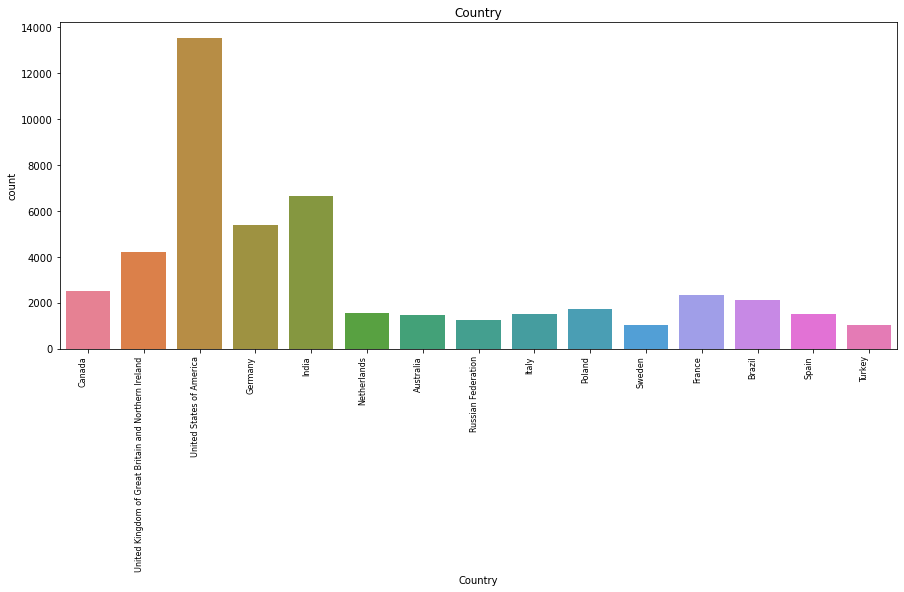

In [40]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Country',data=df,palette="husl",orient='h');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Country")

In [41]:
df_new = df[['DevType', 'LearnCode','LanguageWantToWorkWith','DatabaseWantToWorkWith','ToolsTechWantToWorkWith']]
df_new.head()

,DevType,LearnCode,LanguageWantToWorkWith,DatabaseWantToWorkWith,ToolsTechWantToWorkWith
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Books,NaN,Microsoft SQL Server,NaN
4,NaN,online resources,NaN,NaN,Docker;Kubernetes
5,NaN,Books,NaN,NaN,NaN
6,NaN,online resources,NaN,NaN,npm


In [42]:
df_new = df_new.dropna()

In [43]:
df_new.isnull().sum()

DevType                    0
LearnCode                  0
LanguageWantToWorkWith     0
DatabaseWantToWorkWith     0
ToolsTechWantToWorkWith    0
dtype: int64

In [44]:
df_new.head()

,DevType,LearnCode,LanguageWantToWorkWith,DatabaseWantToWorkWith,ToolsTechWantToWorkWith
728,"Developer, full-stack",School,C#,MySQL,npm
913,"Developer, front-end",School,HTML/CSS;JavaScript;TypeScript,MongoDB,Docker;npm
970,"Developer, full-stack",Books,C#,Microsoft SQL Server,npm
2615,"Developer, front-end;Developer, full-stack;Dev...",online resources,Rust,PostgreSQL,Docker
2735,"Developer, back-end",online resources,Rust,PostgreSQL,Docker;Kubernetes


Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['DevType', 'LearnCode',
                                                         'LanguageWantToWorkWith','DatabaseWantToWorkWith','ToolsTechWantToWorkWith'])


In [47]:
df_final = pd.concat([df_new,one_hot_encoded_data],axis = 1)
df_final.drop(columns=['DevType', 'LearnCode','LanguageWantToWorkWith','DatabaseWantToWorkWith',
                       'ToolsTechWantToWorkWith'],inplace=True)


In [48]:
df_final.head(10)

,"DevType_Developer, back-end","DevType_Developer, front-end","DevType_Developer, front-end;Developer, full-stack;Developer, back-end","DevType_Developer, full-stack","DevType_Developer, full-stack;Developer, back-end",LearnCode_Books,LearnCode_Coding Bootcamp,LearnCode_On the job training,LearnCode_School,LearnCode_online resources,...,DatabaseWantToWorkWith_Microsoft SQL Server,DatabaseWantToWorkWith_MongoDB,DatabaseWantToWorkWith_MySQL,DatabaseWantToWorkWith_PostgreSQL,DatabaseWantToWorkWith_SQLite,ToolsTechWantToWorkWith_Docker,ToolsTechWantToWorkWith_Docker;Kubernetes,ToolsTechWantToWorkWith_Docker;Kubernetes;npm,ToolsTechWantToWorkWith_Docker;npm,ToolsTechWantToWorkWith_npm
728,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
913,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
970,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2615,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2735,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3128,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3475,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4796,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
5074,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6241,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 728 to 72737
Data columns (total 25 columns):
 #   Column                                                                  Non-Null Count  Dtype
---  ------                                                                  --------------  -----
 0   DevType_Developer, back-end                                             62 non-null     uint8
 1   DevType_Developer, front-end                                            62 non-null     uint8
 2   DevType_Developer, front-end;Developer, full-stack;Developer, back-end  62 non-null     uint8
 3   DevType_Developer, full-stack                                           62 non-null     uint8
 4   DevType_Developer, full-stack;Developer, back-end                       62 non-null     uint8
 5   LearnCode_Books                                                         62 non-null     uint8
 6   LearnCode_Coding Bootcamp                                               62 non-null     uint8
 

C:\Users\91720\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


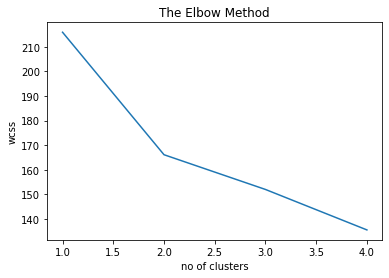

In [50]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,5):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
plt.plot(range(1,5), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
    

In [57]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(df_final)

In [58]:
frame = pd.DataFrame(df_final)
frame['cluster'] = y_kmeans
frame.head(10)

,"DevType_Developer, back-end","DevType_Developer, front-end","DevType_Developer, front-end;Developer, full-stack;Developer, back-end","DevType_Developer, full-stack","DevType_Developer, full-stack;Developer, back-end",LearnCode_Books,LearnCode_Coding Bootcamp,LearnCode_On the job training,LearnCode_School,LearnCode_online resources,...,DatabaseWantToWorkWith_MongoDB,DatabaseWantToWorkWith_MySQL,DatabaseWantToWorkWith_PostgreSQL,DatabaseWantToWorkWith_SQLite,ToolsTechWantToWorkWith_Docker,ToolsTechWantToWorkWith_Docker;Kubernetes,ToolsTechWantToWorkWith_Docker;Kubernetes;npm,ToolsTechWantToWorkWith_Docker;npm,ToolsTechWantToWorkWith_npm,cluster
728,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
913,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
970,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2615,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2735,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3128,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
3475,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
4796,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5074,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
6241,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [59]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_final, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.27542333412208897




Based on the exploratory data analysis (EDA) and clustering analysis, the following key observations have been made:

Age Distribution: A significant portion of coders fall within the age range of 25 to 34 years. This age group appears to be the most active in the coding community.

Learning Preferences: The majority of individuals prefer to learn coding through books and online courses. These resources seem to be the preferred means of acquiring coding skills.

Gender Diversity: The IT domain is predominantly male-dominated, indicating a gender disparity in the industry.

Educational Attainment: Most individuals possess a bachelor's degree as their highest level of education. This suggests that a considerable portion of coders have completed undergraduate studies.

Language Popularity: Python stands out as the most sought-after programming language among developers. Its widespread demand suggests that it is a preferred choice for many.

Docker's Popularity: Over time, Docker, a platform for containerizing applications, is gaining popularity. Developers are increasingly showing interest in this technology.

Geographic Distribution: The United States and India have emerged as the two countries with the highest number of developers, indicating significant tech communities in these regions.









Companies that can leverage this information for targeted advertising:

Online Learning Platforms: Companies that offer coding-related books, online courses, and educational resources can target their advertisements to the age group of 25 to 34, emphasizing the popularity of Python and Docker among other technologies.

Tech Recruitment Firms: Organizations specializing in tech recruitment can tailor their advertising campaigns to attract more female candidates. Promoting inclusivity and diversity initiatives might help in bridging the gender gap in the IT domain.

Python Development Tools: Companies providing tools and services for Python development can focus their marketing efforts on showcasing how their products cater to the growing demand for this language.

Docker Solutions Providers: Companies offering Docker-related services, tools, and consultancy can advertise their offerings to developers interested in containerization, highlighting the technology's increasing adoption.

Educational Institutions: Universities and coding bootcamps can target their advertising towards individuals seeking to advance their coding skills beyond a bachelor's degree, offering specialized courses and programs.

Developer Communities: Companies providing platforms or tools for developers to collaborate and share knowledge can focus their marketing efforts on reaching out to the large developer communities in the United States and India.

By tailoring their advertising strategies based on these observations, companies can effectively reach their target audience and make the most of the trends and preferences in the coding community.